<a href="https://colab.research.google.com/github/ArunK-ML/Chi-Square-Test-in-Hypothesis-Testing_Numpy/blob/main/Chi_Square_Test_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis testing**

**Hypothesis testing** is a method in statistics used to make decisions or inferences about a population based on a sample of data. It helps you determine whether there is enough evidence in your sample to support a particular belief or claim (called a hypothesis) about a population parameter (like a mean or proportion).



# **Chi-Square Test in Hypothesis Testing**

The Chi-Square (χ²) test is used to test whether there is a significant difference between the observed and expected frequencies in one or more categories.

There are two main types of chi-square tests in hypothesis testing:

**1. Chi-Square Goodness of Fit Test.**

**2. Chi-Square Test of Independence**

# **1. Chi-Square Goodness of Fit Test**

This test checks if a single categorical variable follows a specific distribution (like uniform, normal, etc.)

**Example:**
A dice is rolled 60 times.
You want to check if it is fair (each number from 1 to 6 should appear 10 times).


You get this observed data:

**Observed:**      [8, 9, 10, 12, 11, 10]

**Expected (Fair Dice):**      [10, 10, 10, 10, 10, 10]

✅**Check Hypotheses**

*   H₀ (Null): The data follows the expected distribution (fair dice).
*   H₁ (Alternative): The data does not follow the expected distribution.


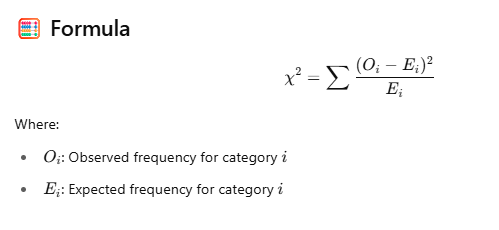





**✅ Step-by-Step Calculation (by hand)**

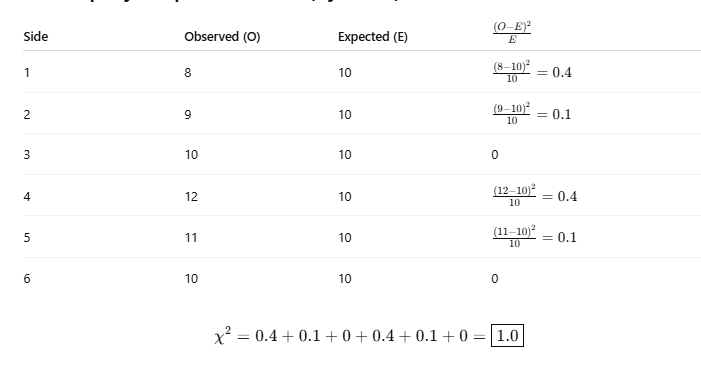

**✅ Degrees of Freedom (df)**

Degree of freedom = (n - 1)

Where, n is number of categories

       Calucate the degree of freedom (df) = 6 − 1 = 5

**✅ Find the p-value**

Use a chi-square table or Python:

For 𝜒2 = 1.0 and 𝑑𝑓 = 5 ,

**→ p-value ≈ 0.96**

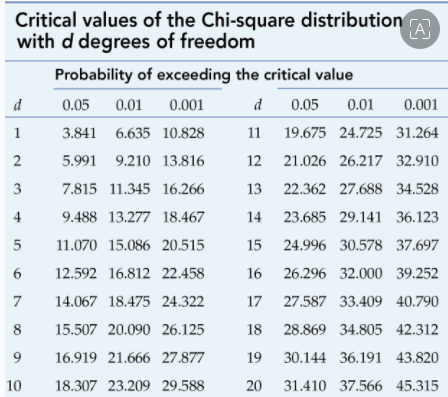

**✅ Conclusion (alpha (α) = 0.05)**

Where α = Significance Level

Since p = 0.96 > 0.05,

🟢 Fail to reject H₀ → The dice is likely fair.



**Solve using Numpy**



In [14]:
from scipy.stats import chisquare

observed = [8, 9, 10, 12, 11, 10]
expected = [10, 10, 10, 10, 10, 10]

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-Square Statistic:", chi2_stat)
print("\n")
print("p-value:", p_value)
print("\n")

if p_value < 0.05:
    print("🔴 Reject H₀: Observed distribution does not match expected.")
else:
    print("🟢 Fail to Reject H₀: Observed distribution matches expected.")

Chi-Square Statistic: 1.0


p-value: 0.9625657732472964


🟢 Fail to Reject H₀: Observed distribution matches expected.


Chi-Square Statistic: 1.0
p-value: 0.9625657732472964
🟢 Fail to Reject H₀: Observed distribution matches expected.


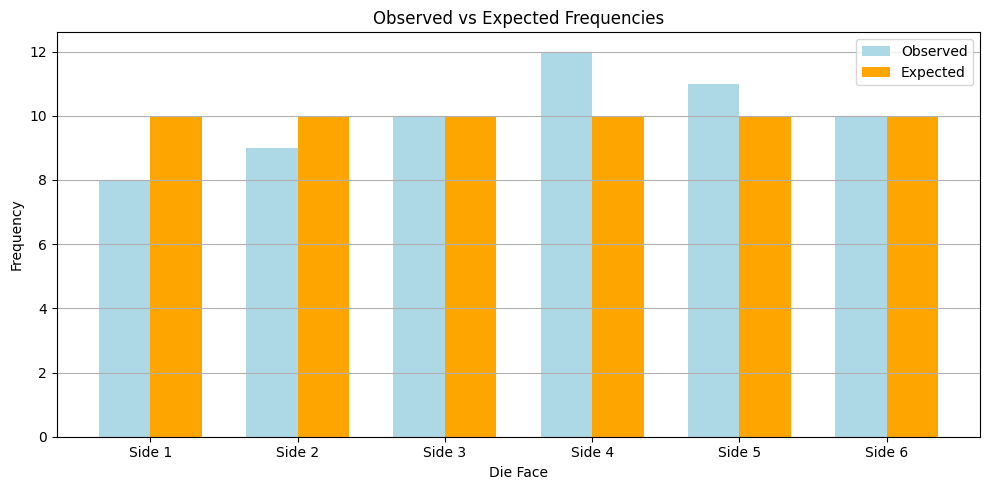

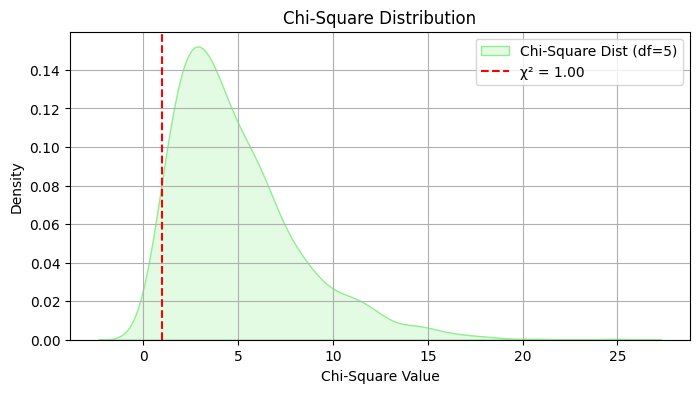

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, chi2

# Input Data
observed = [8, 9, 10, 12, 11, 10]
expected = [10, 10, 10, 10, 10, 10]

# Perform Chi-Square Goodness of Fit Test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Print test results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("🔴 Reject H₀: Observed distribution does not match expected.")
else:
    print("🟢 Fail to Reject H₀: Observed distribution matches expected.")

# ===============================
# 🔹 Bar Plot: Observed vs Expected
# ===============================
labels = ['Side 1', 'Side 2', 'Side 3', 'Side 4', 'Side 5', 'Side 6']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, observed, width, label='Observed', color='lightblue')
plt.bar(x + width/2, expected, width, label='Expected', color='orange')
plt.xticks(x, labels)
plt.xlabel("Die Face")
plt.ylabel("Frequency")
plt.title("Observed vs Expected Frequencies")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ===============================
# 🔹 KDE Plot: Chi-Square Distribution
# ===============================
df = len(observed) - 1
x_vals = np.linspace(0, 20, 1000)
samples = chi2.rvs(df=df, size=1000)

plt.figure(figsize=(8, 4))
sns.kdeplot(samples, fill=True, label=f"Chi-Square Dist (df={df})", color="lightgreen")
plt.axvline(chi2_stat, color='red', linestyle='--', label=f'χ² = {chi2_stat:.2f}')
plt.title("Chi-Square Distribution")
plt.xlabel("Chi-Square Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

🔹**2. Chi-Square Test of Independence of Attributes**

**Use case:**
Check if two categorical variables are independent.


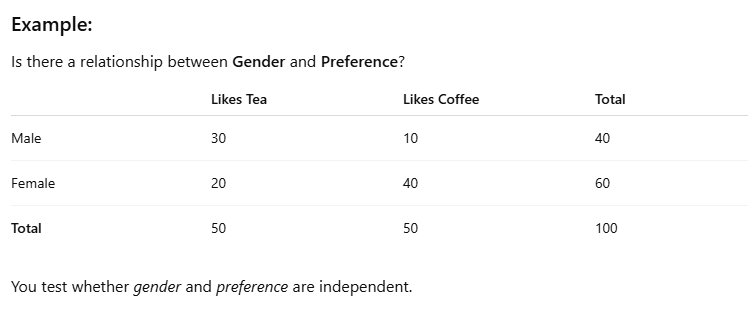



Finding Expected Values By Calculation

**In Math Caculation**


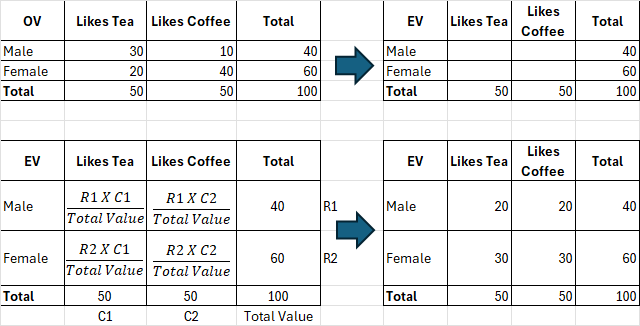

**Degree of freedom = (r-1) x (c-1)**

Where, **r** - No. of rows and **c** - No. of Colums

    Calcualte Degree of freedom (df) = (2-1) x (2-1) = 1

**Finding Chi-square**

Use this formula

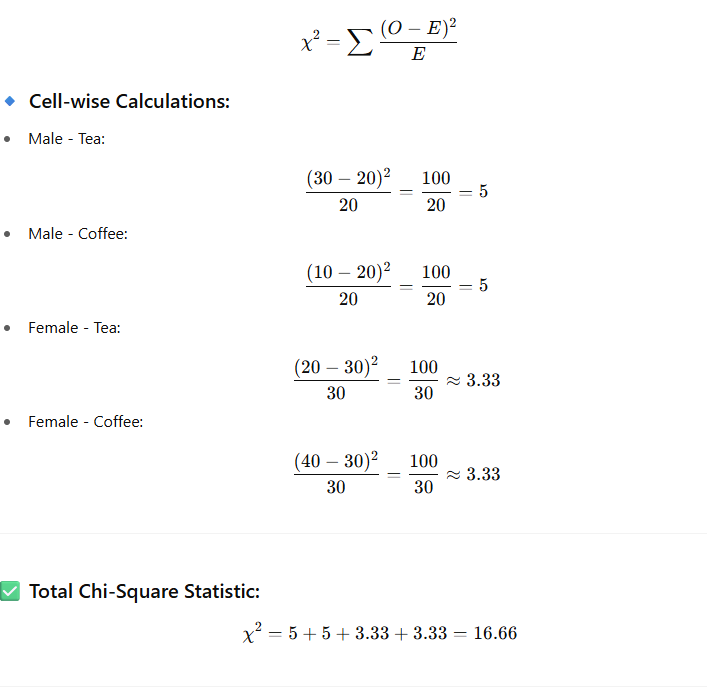


 **Find p-value (using chi-square table)**

For  ==> 𝜒2=16.66 and df=1,

From the chi-square table, the p-value < 0.0001

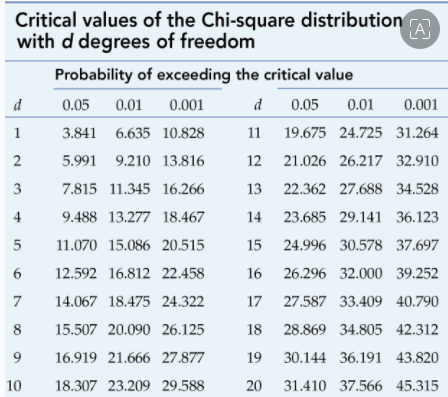

**Final Decision (α = 0.05):**

p-value < 0.05 ⇒ Reject H₀


**🧪 Conclusion:**

There is a significant relationship between gender and drink preference (tea vs coffee).

In [6]:
# In By using Numpy

import numpy as np
from scipy.stats import chi2_contingency

# Observed data: Gender vs Preference

data = np.array([[30, 10],   # Male: Tea, Coffee
                 [20, 40]])  # Female: Tea, Coffee

# Perform Chi-Square Test

chi2, p, dof, expected = chi2_contingency(data)

# Print all results

print("Observed Table:\n", data)
print("\n")
print("Expected Table (if variables were independent):\n", expected)
print("\n")
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("\n")

# Hypothesis testing decision

alpha = 0.05   #Means- 5%
if p < alpha:
    print("🔴 Reject Null Hypothesis: Gender and Preference are dependent.")
else:
    print("🟢 Fail to Reject Null: Gender and Preference are independent.")

Observed Table:
 [[30 10]
 [20 40]]


Expected Table (if variables were independent):
 [[20. 20.]
 [30. 30.]]


Chi-Square Statistic: 15.041666666666666
Degrees of Freedom: 1
p-value: 0.00010516355403363098


🔴 Reject Null Hypothesis: Gender and Preference are dependent.


Observed Table:
 [[30 10]
 [20 40]] 

Expected Table (if variables were independent):
 [[20. 20.]
 [30. 30.]] 

Chi-Square Statistic: 15.041666666666666
Degrees of Freedom: 1
p-value: 0.00010516355403363098 

🔴 Reject Null Hypothesis: Gender and Preference are dependent.


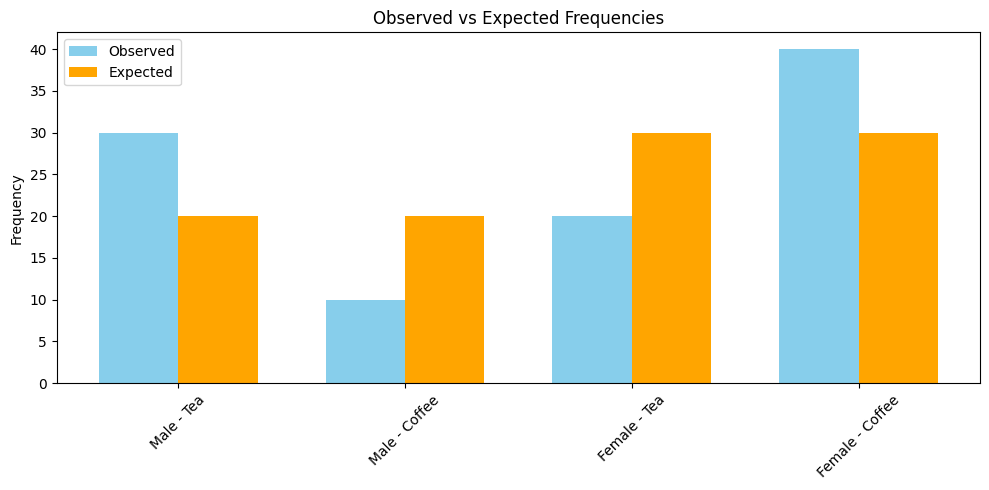

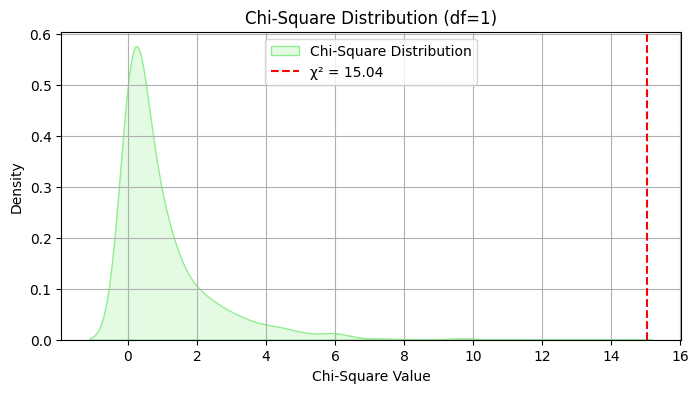

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2

# Observed data: Gender vs Preference
data = np.array([[30, 10],   # Male: Tea, Coffee
                 [20, 40]])  # Female: Tea, Coffee

# Perform Chi-Square Test
chi2_stat, p, dof, expected = chi2_contingency(data)

# Print results
print("Observed Table:\n", data, "\n")
print("Expected Table (if variables were independent):\n", expected, "\n")
print("Chi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p, "\n")

# Hypothesis decision
alpha = 0.05
if p < alpha:
    print("🔴 Reject Null Hypothesis: Gender and Preference are dependent.")
else:
    print("🟢 Fail to Reject Null: Gender and Preference are independent.")

# =======================
# 🔹 Plot 1: Observed vs Expected Bar Plot
# =======================
labels = ['Male - Tea', 'Male - Coffee', 'Female - Tea', 'Female - Coffee']
observed_flat = data.flatten()
expected_flat = expected.flatten()

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, observed_flat, width, label='Observed', color='skyblue')
plt.bar(x + width/2, expected_flat, width, label='Expected', color='orange')
plt.xticks(x, labels, rotation=45)
plt.ylabel("Frequency")
plt.title("Observed vs Expected Frequencies")
plt.legend()
plt.tight_layout()
plt.show()

# =======================
# 🔹 Plot 2: Chi-Square Distribution with Test Statistic (KDE Plot)
# =======================
x_vals = np.linspace(0, 20, 1000)
samples = chi2.rvs(df=dof, size=1000)

plt.figure(figsize=(8, 4))
sns.kdeplot(samples, label="Chi-Square Distribution", fill=True, color="lightgreen")
plt.axvline(x=chi2_stat, color='red', linestyle='--', label=f'χ² = {chi2_stat:.2f}')
plt.title("Chi-Square Distribution (df=1)")
plt.xlabel("Chi-Square Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
